In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob, os
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
import utils

In [3]:
from pathlib import Path
current_working_directory = Path.cwd()

In [4]:
METRIC = 'LLC-load-misses_percent'
SERVER = 'server'

In [8]:
DATAPATH = f"{current_working_directory}/../data/server_data.csv"

In [9]:
data = pd.read_csv(DATAPATH)
utils.clean_and_format_df(data)

In [10]:
data.columns

Index(['__run_id', '__done', 'subject', 'target', 'cache-references',
       'cache-misses', 'LLC-loads', 'LLC-load-misses', 'LLC-stores',
       'LLC-store-misses', 'cache-misses_percent', 'LLC-load-misses_percent',
       'LLC-store-misses_percent', 'DRAM_ENERGY (J)', 'PACKAGE_ENERGY (J)',
       'PP0_ENERGY (J)', 'PP1_ENERGY (J)', 'TOTAL_MEMORY', 'TOTAL_SWAP',
       'USED_MEMORY', 'USED_SWAP', 'execution_time', 'PROCESS_CPU_USAGE',
       'PROCESS_MEMORY', 'PROCESS_VIRTUAL_MEMORY', 'CPU_USAGE_0',
       'CPU_USAGE_1', 'CPU_USAGE_2', 'CPU_USAGE_3', 'CPU_FREQUENCY_0',
       'CPU_FREQUENCY_1', 'CPU_FREQUENCY_2', 'CPU_FREQUENCY_3'],
      dtype='object')

In [11]:
data = data.dropna(subset=[METRIC])
data['LLC-hits_percent'] = ((data['LLC-loads'] - data['LLC-load-misses']) / data['LLC-loads']) * 100
CACHE_METRICS = ['LLC-loads', 'LLC-load-misses', 'LLC-load-misses_percent', 'LLC-hits_percent']

In [12]:
subjects = list(set(data['subject'].values))
targets = ['mandelbrot', 'fannkuch_redux', 'binary_trees', 'n_body', 'spectralnorm', 'k_nucleotide', 'fasta']

GROUPS = list(
    product(subjects, targets)
)

In [13]:
data['subject'] = pd.Categorical(
    data['subject'],
    ['cpython', 'pypy', 'numba', 'pyston-lite', 'py3.13-jit', 'nuitka', 'cython', 'codon', 'mypyc']
)

## Descriptive Statistics

### Descriptive Statistics per Benchmark

In [14]:
def reform(dictionary):
    return {(outerKey, innerKey): values for outerKey, innerDict in dictionary.items() for innerKey, values in innerDict.items()}

In [15]:
df = utils.get_rows_by_subject_target(data, 'codon', 'mandelbrot')
df

,__run_id,__done,subject,target,cache-references,cache-misses,LLC-loads,LLC-load-misses,LLC-stores,LLC-store-misses,...,PROCESS_VIRTUAL_MEMORY,CPU_USAGE_0,CPU_USAGE_1,CPU_USAGE_2,CPU_USAGE_3,CPU_FREQUENCY_0,CPU_FREQUENCY_1,CPU_FREQUENCY_2,CPU_FREQUENCY_3,LLC-hits_percent
4,run_28_repetition_0,DONE,codon,mandelbrot,24197463.0,1510132.0,6631058.0,539088.0,6414190.0,968114.0,...,8568832.0,99.294987,2.450541,3.014014,1.594542,1599.510460,1600.000000,1600.0,1600.000000,91.870257
135,run_28_repetition_9,DONE,codon,mandelbrot,25855745.0,1806129.0,6944505.0,606212.0,6899458.0,1105174.0,...,36372480.0,99.291764,1.957330,2.317183,2.338744,1599.540915,1599.998613,1600.0,1599.998613,91.270623
210,run_28_repetition_2,DONE,codon,mandelbrot,23713687.0,1897315.0,6835500.0,735525.0,7222694.0,1239876.0,...,421888.0,99.412354,1.963963,3.777635,2.307549,1599.537709,1600.000000,1600.0,1600.000000,89.239631
241,run_28_repetition_6,DONE,codon,mandelbrot,25694835.0,2290674.0,7232235.0,744214.0,6975610.0,1354390.0,...,10080256.0,98.989798,3.791512,3.187892,2.829133,1599.532123,1600.000000,1600.0,1600.000000,89.709765
326,run_28_repetition_7,DONE,codon,mandelbrot,26827822.0,4233025.0,7321327.0,1392034.0,7251332.0,2555265.0,...,8568832.0,99.149683,3.427456,5.796211,3.660445,1599.504881,1599.998605,1600.0,1600.000000,80.986589
343,run_28_repetition_3,DONE,codon,mandelbrot,24344011.0,3410470.0,6817612.0,1027375.0,7184531.0,2118745.0,...,9838592.0,98.281751,3.404496,3.388414,3.883016,1599.531381,1600.000000,1600.0,1600.000000,84.930574
354,run_28_repetition_1,DONE,codon,mandelbrot,24469202.0,3904620.0,7035767.0,1305106.0,7289442.0,2451075.0,...,36483072.0,99.288146,3.967541,4.073238,3.946618,1599.505571,1599.998607,1600.0,1600.000000,81.450409
429,run_28_repetition_8,DONE,codon,mandelbrot,24662466.0,3406227.0,6503108.0,1135270.0,7040153.0,2101351.0,...,10342400.0,99.411947,3.463229,3.230480,3.116850,1599.527855,1600.000000,1600.0,1600.000000,82.542655
440,run_28_repetition_4,DONE,codon,mandelbrot,25655190.0,4011511.0,7404319.0,1496587.0,7177583.0,2529828.0,...,8568832.0,97.717782,3.622038,3.281456,3.462425,1599.507628,1600.000000,1600.0,1599.997226,79.787648
485,run_28_repetition_5,DONE,codon,mandelbrot,28646491.0,4143350.0,7406860.0,1374976.0,7688148.0,2566629.0,...,36372480.0,97.770675,3.314164,3.773740,3.449818,1599.517385,1600.000000,1600.0,1600.000000,81.436452


In [16]:
descriptive = []
for subject in subjects:
    row = {}
    row['subject'] = subject

    for target in targets:
        df = utils.get_rows_by_subject_target(data, subject, target)
        #stats = {'subject': subject, 'target' : target} | reform(df[ENERGY_METRICS].describe().to_dict())
        # 'LLC-load-misses', 'LLC-load-misses_percent'
        #row[(target, 'TOTAL LOADS')] = df['LLC-loads'].mean()
        #row[(target, 'MISSES')] = df['LLC-load-misses'].mean()
        row[(target, 'MISSES PERCENT')] = df['LLC-load-misses_percent'].mean()
        row[(target, 'HITS PERCENT')] = df['LLC-hits_percent'].mean()
        row[(target, 'MISSES PERCENT-CV')] = df['LLC-load-misses_percent'].std() / df['LLC-load-misses_percent'].mean()
        
    descriptive.append(row)

#columns = pd.MultiIndex.from_product([targets, ['CPU', 'DRAM']])
table = pd.DataFrame(descriptive)
table = table.sort_values(by='subject')

table

,subject,"(mandelbrot, MISSES PERCENT)","(mandelbrot, HITS PERCENT)","(mandelbrot, MISSES PERCENT-CV)","(fannkuch_redux, MISSES PERCENT)","(fannkuch_redux, HITS PERCENT)","(fannkuch_redux, MISSES PERCENT-CV)","(binary_trees, MISSES PERCENT)","(binary_trees, HITS PERCENT)","(binary_trees, MISSES PERCENT-CV)",...,"(n_body, MISSES PERCENT-CV)","(spectralnorm, MISSES PERCENT)","(spectralnorm, HITS PERCENT)","(spectralnorm, MISSES PERCENT-CV)","(k_nucleotide, MISSES PERCENT)","(k_nucleotide, HITS PERCENT)","(k_nucleotide, MISSES PERCENT-CV)","(fasta, MISSES PERCENT)","(fasta, HITS PERCENT)","(fasta, MISSES PERCENT-CV)"
5,codon,14.677540,85.322460,0.321379,17.895734,82.104266,0.322704,43.925366,56.074634,0.009979,...,0.427504,23.748168,76.251832,0.289607,5.138606,94.861394,0.335982,19.076686,80.923314,0.272215
1,cpython,6.110446,93.889554,0.438570,24.603285,75.396715,0.090059,74.094583,25.905417,0.002629,...,0.275737,0.761577,99.238423,0.144201,31.688462,68.311538,0.055032,1.834936,98.165064,0.121583
3,cython,5.290732,94.709268,0.411340,21.367049,78.632951,0.321973,74.228524,25.771476,0.001586,...,0.464869,0.606265,99.393735,0.308293,29.592914,70.407086,0.059262,1.768033,98.231967,0.309695
7,mypyc,5.688142,94.311858,0.595573,23.657995,76.342005,0.450268,66.308395,33.691605,0.005281,...,0.319203,0.740110,99.259890,0.337651,29.576080,70.423920,0.140707,2.349104,97.650896,0.563503
8,nuitka,65.539141,34.460859,0.072919,64.404765,35.595235,0.124317,45.636813,54.363187,0.225942,...,0.229979,66.885858,33.114142,0.067071,44.223956,55.776044,0.158596,61.421090,38.578910,0.089437
0,numba,8.114221,91.885779,0.077598,19.836533,80.163467,0.045001,51.417367,48.582633,0.020937,...,0.037027,15.804702,84.195298,0.046984,12.615212,87.384788,0.103310,4.015631,95.984369,0.112758
2,py3.13-jit,6.646690,93.353310,0.336279,12.126703,87.873297,0.598567,73.527017,26.472983,0.003892,...,0.475955,0.869602,99.130398,0.284533,29.869625,70.130375,0.030599,1.619620,98.380380,0.134614
6,pypy,5.669811,94.330189,0.267938,2.671664,97.328336,0.342109,35.529969,64.470031,0.008191,...,1.204125,6.760661,93.239339,0.192939,34.001916,65.998084,0.045675,4.414017,95.585983,0.115390
4,pyston-lite,4.150485,95.849515,0.319501,21.502803,78.497197,0.418752,74.025560,25.974440,0.001207,...,0.360752,0.749664,99.250336,0.471300,30.985577,69.014423,0.038657,2.429622,97.570378,0.528201


latex_table = table.round(3).to_latex(index=False, float_format="%.2f")
print(latex_table)

### Aggregated Descriptive Statistics

In [17]:
descriptive = []
for subject in subjects:
    df = data[data['subject'] == subject]
    stats = {'subject': subject} | reform(df[CACHE_METRICS].describe().to_dict())
    row = {
        'subject': subject,
        ('LLC-loads', 'mean'): stats[('LLC-loads', 'mean')],
        ('LLC-load-misses', 'mean'): stats[('LLC-load-misses', 'mean')],
        ('LLC-load-misses_percent', 'mean'): stats[('LLC-load-misses_percent', 'mean')],
        ('LLC-hits_percent', 'mean'): stats[('LLC-hits_percent', 'mean')],
        ('LLC-load-misses_percent', 'cv'): stats[('LLC-load-misses_percent', 'std')] / stats[('LLC-load-misses_percent', 'mean')],

    }
    descriptive.append(row)

#columns = pd.MultiIndex.from_product([ENERGY_METRICS, ['mean', 'std', 'min', '50%', 'max']])
table = pd.DataFrame(descriptive)
table = table.sort_values(by='subject')
table

,subject,"(LLC-loads, mean)","(LLC-load-misses, mean)","(LLC-load-misses_percent, mean)","(LLC-hits_percent, mean)","(LLC-load-misses_percent, cv)"
5,codon,2.038504e+08,3.951667e+07,20.889613,79.110387,0.592871
1,cpython,4.405553e+09,3.163696e+09,21.724785,78.275215,1.127141
3,cython,4.285182e+09,3.077564e+09,20.381781,79.618219,1.200473
7,mypyc,1.830937e+09,1.130470e+09,20.059395,79.940605,1.097224
8,nuitka,4.282891e+08,3.095207e+08,58.733688,41.266312,0.205500
0,numba,2.181885e+08,7.450729e+07,18.224406,81.775594,0.797209
2,py3.13-jit,1.714088e+09,1.138722e+09,18.128894,81.871106,1.369199
6,pypy,8.636893e+08,2.010827e+08,13.246550,86.753450,1.067458
4,pyston-lite,4.279656e+09,3.068024e+09,20.678630,79.321370,1.184987


latex_table = table.round(3).to_latex(index=False, float_format="%.2f")
print(latex_table)

## BarPlots

In [18]:
colors = [
    "#FF6B6B",  # Coral Red
    "#4ECDC4",  # Turquoise
    "#FFA07A",  # Light Salmon
    "#6A3D9A",  # Purple
    "#FFD700",  # Gold
    "#45B7D1",  # Sky Blue
    "#98D8C8",  # Mint
    "#FF69B4",  # Hot Pink
    "#8B4513"   # Saddle Brown
]

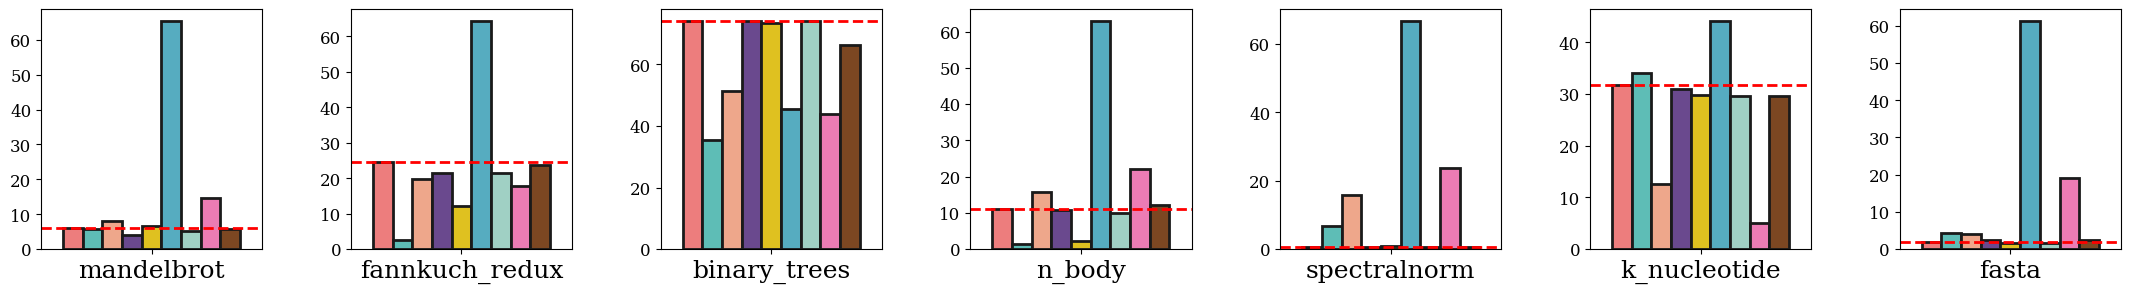

In [19]:
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
fig, axes = plt.subplots(1, 7, figsize=(26, 3))
axs_flat = axes.flatten()

for i in range(7):
    df = data[data['target'] == targets[i]]
    df.sort_values(by=['subject'])
    sns.barplot(
        x="target", y='LLC-load-misses_percent', hue="subject", capsize = 0.5, errorbar=None, edgecolor = '0.1', lw=2, data=df, ax = axs_flat[i], dodge=True,
        palette=colors
    )

    axs_flat[i].get_legend().remove()
    axs_flat[i].set_xlabel('')
    axs_flat[i].set_ylabel('')
    axs_flat[i].tick_params(axis='x', labelsize=18)
    
    first_bar = axs_flat[i].patches[0]
    bar_height = first_bar.get_height()
    axs_flat[i].axhline(y=bar_height, color='red', linestyle='--', linewidth=2)
        
plt.subplots_adjust(wspace=0)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, hspace=0.4, wspace=0.4)

plt.savefig(f"{SERVER}_{METRIC}.pdf", format="pdf", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

## Normality

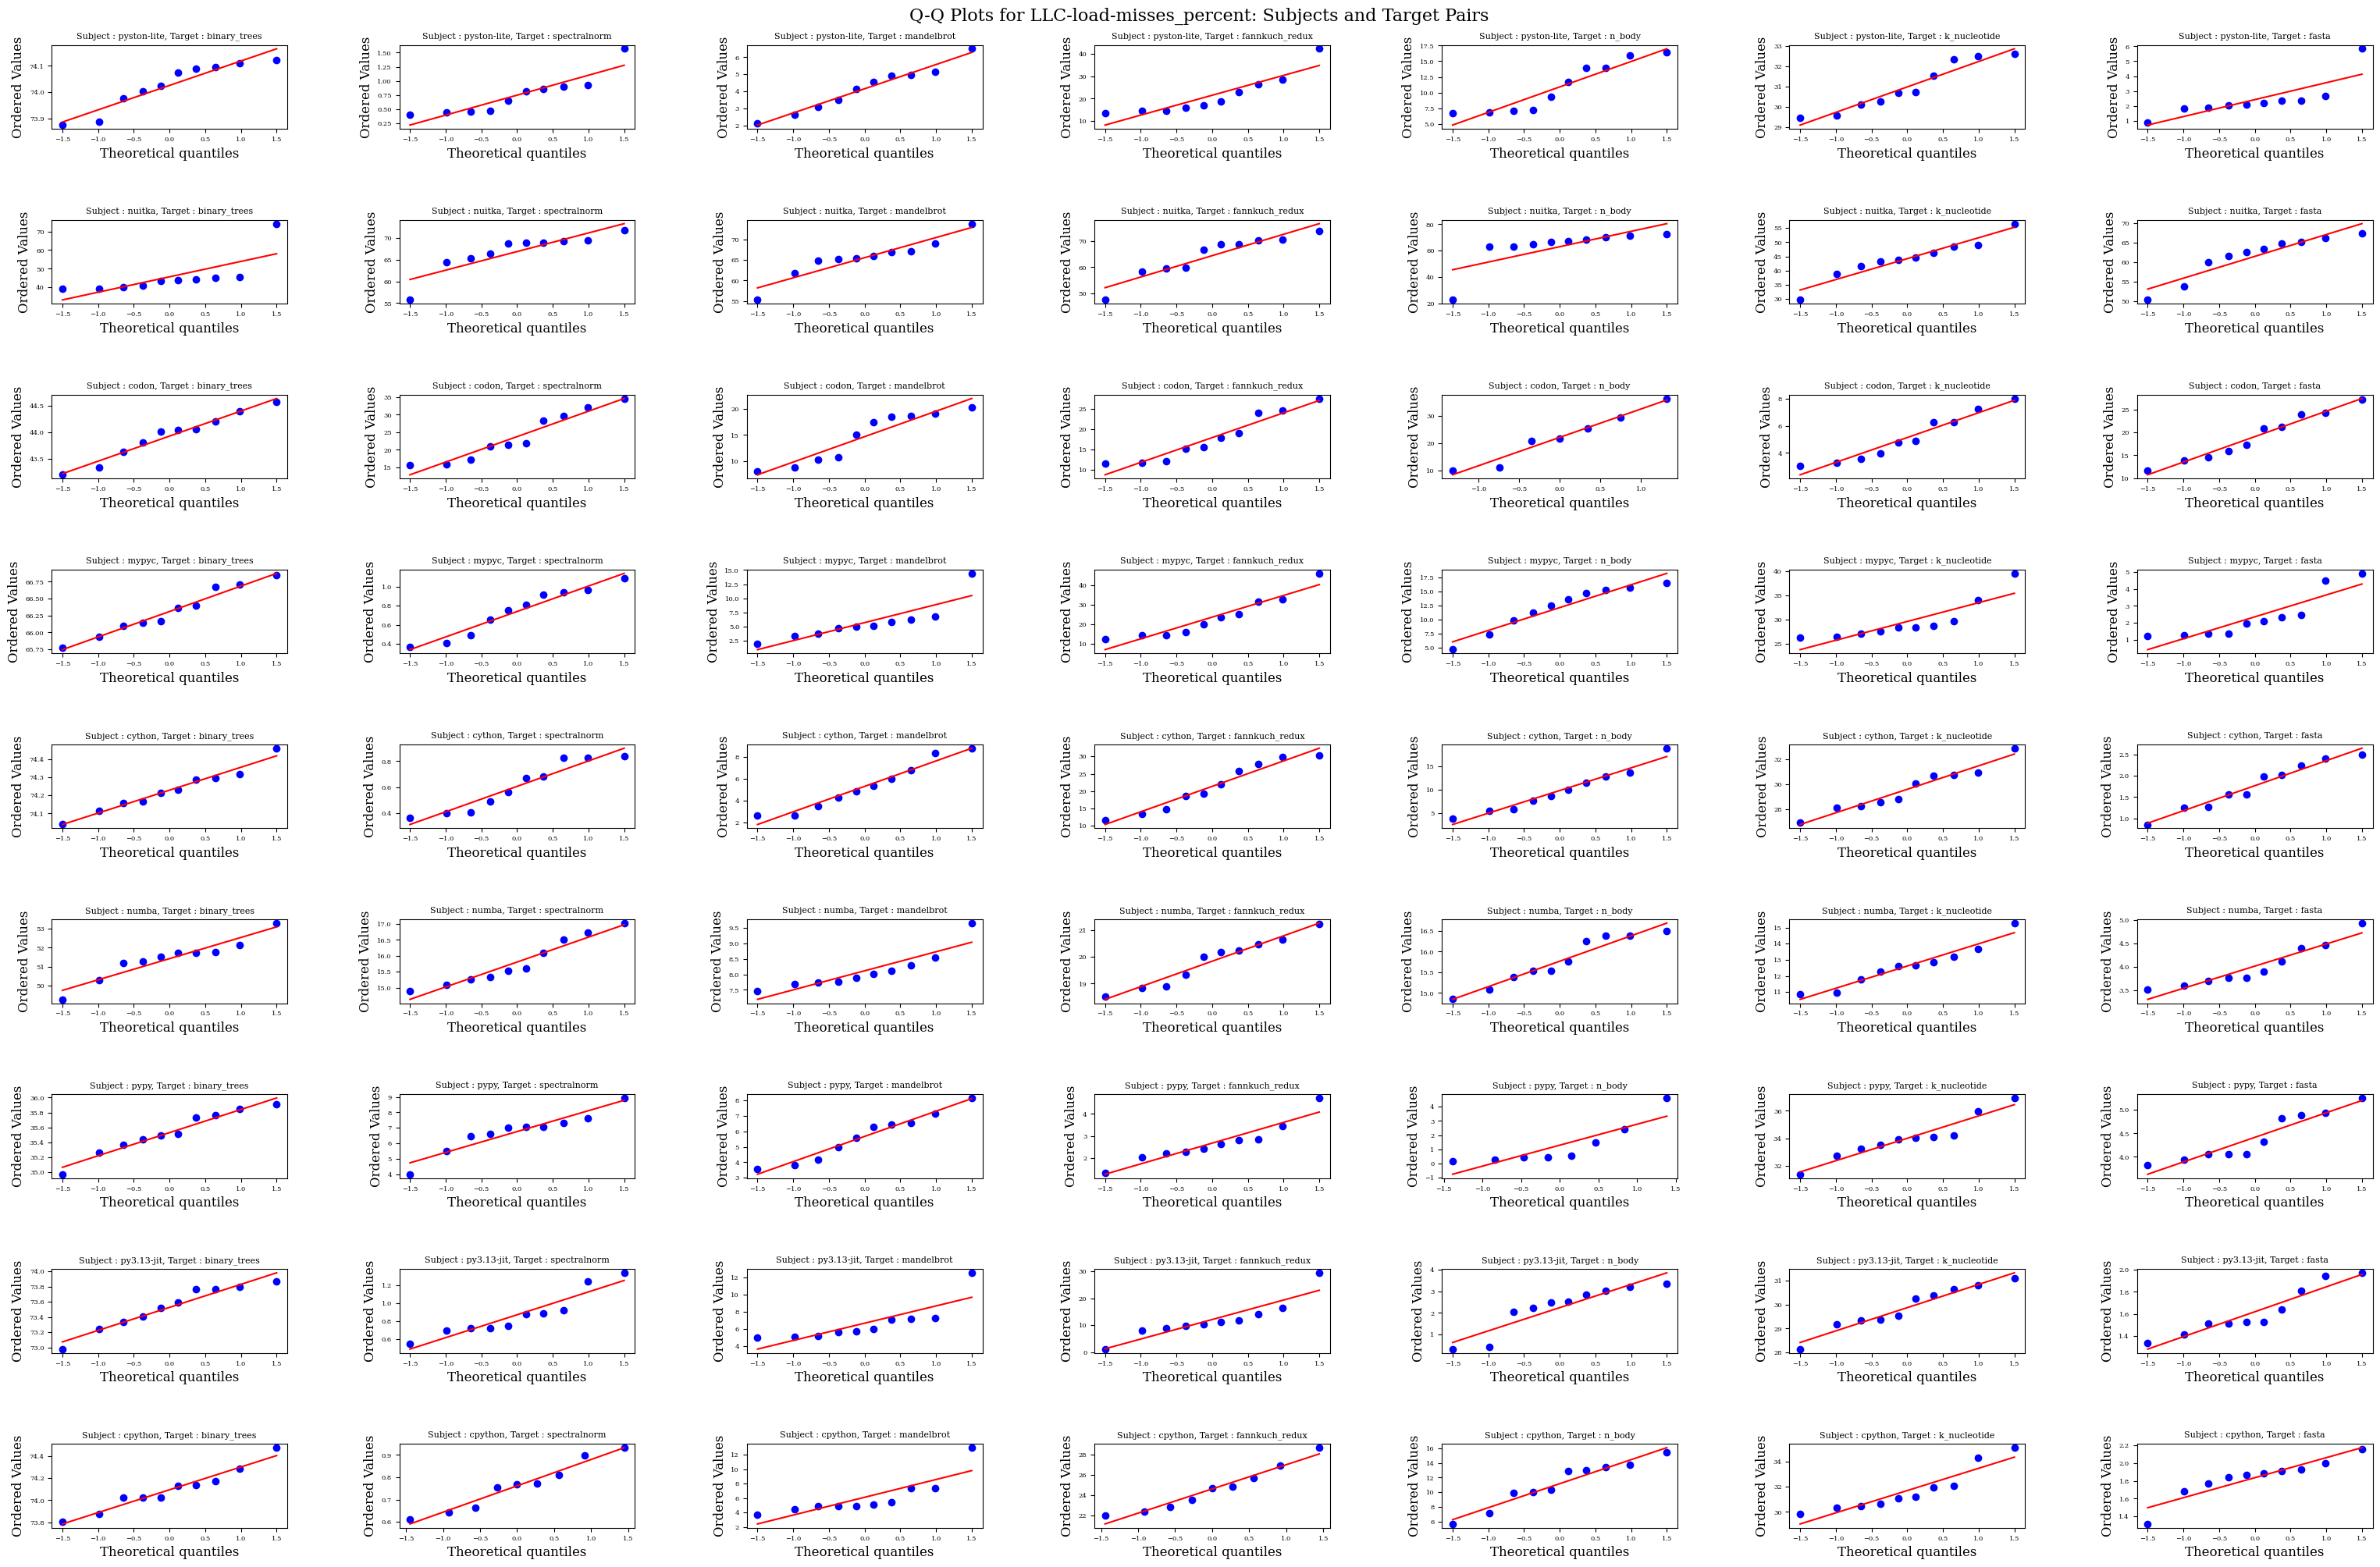

In [20]:
utils.plot_qq_grid(data, METRIC)

## Kruskal

In [21]:
from scipy.stats import kruskal

In [22]:
samples = []
for subject in subjects:
    df = data[data['subject'] == subject][METRIC]
    samples.append(df.to_list())

stat, p_value = kruskal(*samples)
print({'stat': stat, 'p_value': p_value})

{'stat': 138.79638274794183, 'p_value': 4.222279615087072e-26}


## Cliffs Delta

In [23]:
from cliffs_delta import cliffs_delta
import itertools

In [24]:
# Baseline - CPython Group
baseline = [utils.get_rows_by_subject_target(data, 'cpython', target)[METRIC].to_list() for target in targets]
baseline = list(itertools.chain(*baseline))

In [25]:
rows = []
for subject in subjects:
    sample = [utils.get_rows_by_subject_target(data, subject, target)[METRIC].to_list() for target in targets]
    sample = list(itertools.chain(*sample))
    value, difference = cliffs_delta(baseline, sample)
    row = {'subject': subject, 'value': value, 'difference': difference}
    rows.append(row)

cliffs = pd.DataFrame(rows)
cliffs

,subject,value,difference
0,numba,-0.087395,negligible
1,cpython,0.000000,negligible
2,py3.13-jit,0.165546,small
3,cython,0.042437,negligible
4,pyston-lite,0.025630,negligible
5,codon,-0.180860,small
6,pypy,0.090830,negligible
7,mypyc,0.036555,negligible
8,nuitka,-0.698319,large


In [26]:
# nuitka and codon reduce the number of LLC-cache misses